In [1]:
# Import Libraries.
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.preprocessing import OrdinalEncoder
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['font.size'] = 6.0

In [2]:
# Define Functions.
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [3]:
# Import Data.
filename = 'wiki_movie_plots_deduped.csv'
data = pd.read_csv(filename, sep=',',header=0,index_col=False)

In [4]:
# Parameters.
n_features = 500 # amount of distinct words / vocabulary
n_components = 10 # amount of topics
n_top_words = 10 # highest frequency words in topics

In [6]:
# Term Frequency-Inverse Document Frequency (Matrix Calculation).
samples = data.Plot # text samples
labels = OrdinalEncoder().fit_transform(np.array(data.Genre).reshape(-1,1)) # genres

# Convert a collection of raw documents to a matrix of TF-IDF features (samples x features).
# tf-idf: relative frequency of a word in a document weighted by the discriminancy of a word between document classes
tfidf_vectorizer = TfidfVectorizer(max_df=0.30, min_df=2,max_features=n_features,stop_words='english')

# Convert a collection of text documents to a matrix of token counts.
#tf_vectorizer = CountVectorizer(max_df=0.95, min_df=4,max_features=n_features,stop_words='english')

# Fit-Transform.
tfidf = tfidf_vectorizer.fit_transform(samples) # term frequency weighted by document discriminancy, samples x features 
# tf = tf_vectorizer.fit_transform(samples) # term frequency, samples x features 

In [97]:
# Non-negative Matrix Factorization.
nmf =  NMF(n_components=n_components, random_state=1,beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.4,l1_ratio=.5)

# Fit NMF.
nmf.fit(tfidf)

# Print Top Words for Topics.
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Topic #0: finds tells takes away goes tries night home way day
Topic #1: father daughter family mother son married marriage marry falls comes
Topic #2: film story set movie people world plot played begins follows
Topic #3: police killed kill murder officer kills death man revenge killing
Topic #4: war world army ship group king attack battle return men
Topic #5: wife woman husband man married young wealthy john affair turns
Topic #6: school friends student girl high college tom teacher year win
Topic #7: family years son year father mother younger working brother home
Topic #8: money work way job make takes new gets wants works
Topic #9: young man new york old town woman year named father



In [98]:
# Latent Dirichlet Allocation.
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,learning_method='online',learning_offset=50,random_state=1)

# Fit LDA.
lda.fit(tfidf)

# Print Top Words for Topics.
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(lda, tfidf_feature_names, n_top_words)

Topic #0: father family village son mother daughter story marriage married wife
Topic #1: jack joe david john harry paul johnny peter nick george
Topic #2: school new friends home father film day tells house mother
Topic #3: film tony mike mary story plot martin lead race movie
Topic #4: raja lee ray richard killer murder detective murdered revenge crime
Topic #5: sam charlie woman movie young women man girl falls star
Topic #6: tom jerry billy don causing window chris head vijay face
Topic #7: police gang murder man money killed kill car case officer
Topic #8: michael played eddie story film play dance told american girl
Topic #9: king war army raj earth world group ship japanese battle



In [99]:
# Singular Value Decomposition.
svd = TruncatedSVD(n_components=n_components)

# Fit SVD.
svd.fit(tfidf)

# Print Top Words for Topics.
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(svd, tfidf_feature_names, n_top_words)

Topic #0: father family man mother house police film son home tells
Topic #1: family father mother son marriage village daughter married story marry
Topic #2: film story war movie world young set played plot british
Topic #3: village police son gang killed officer kill murder brother story
Topic #4: police film murder money story car gang joe man house
Topic #5: tom jerry wife husband man family john woman son young
Topic #6: tom school father jerry gang police family team village students
Topic #7: family film mother father son brother sam john paul death
Topic #8: family village joe money brother new house jack job sam
Topic #9: joe young village man father town jack john mother gang



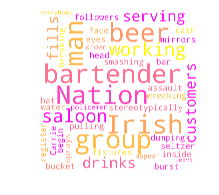

In [50]:
# Word Cloud

wordcloud = WordCloud(max_font_size=800,max_words=100,background_color='white',colormap=plt.cm.spring,width=5000,height=5000,mode='RGB',scale=1).generate(samples[0])

plt.figure(figsize=(2.95,2.95))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('word_cloud',dpi=900,transparent=True,orientation='landscape',bbox_inches='tight')
plt.savefig('word_cloud',dpi=900,transparent=True,orientation='landscape',bbox_inches='tight',format='pdf')
plt.show()